In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data_batchNorm_iid1_unbalanced0 = pd.read_csv("fedAVG_results/ResNet50_100_sgd_lr_[0.001]_C[0.1]_iid[1]_unbalanced[0]_E[1]_B[10]_BatchNorm_numGroups[0].csv")
data_batchNorm_iid0_unbalanced0 = pd.read_csv("fedAVG_results/ResNet50_100_sgd_lr_[0.001]_C[0.1]_iid[0]_unbalanced[0]_E[1]_B[10]_BatchNorm_numGroups[0].csv")
data_batchNorm_iid0_unbalanced1 = pd.read_csv("fedAVG_results/ResNet50_100_sgd_lr_[0.001]_C[0.1]_iid[0]_unbalanced[1]_E[1]_B[10]_BatchNorm_numGroups[0].csv")
data_groupNorm_iid1_unbalanced0 = pd.read_csv("fedAVG_results/ResNet50_100_sgd_lr_[0.001]_C[0.1]_iid[1]_unbalanced[0]_E[1]_B[10]_GroupNorm_numGroups[4].csv")
data_groupNorm_iid0_unbalanced0 = pd.read_csv("fedAVG_results/ResNet50_100_sgd_lr_[0.001]_C[0.1]_iid[0]_unbalanced[0]_E[1]_B[10]_GroupNorm_numGroups[4].csv")
data_groupNorm_iid0_unbalanced1 = pd.read_csv("fedAVG_results/ResNet50_100_sgd_lr_[0.001]_C[0.1]_iid[0]_unbalanced[1]_E[1]_B[10]_GroupNorm_numGroups[4].csv")

In [2]:
data_groupNorm_iid1_unbalanced0.head(10)

,Unnamed: 0,train_loss,train_accuracy
0,0,3.358929,0.1374
1,1,2.686307,0.0954
2,2,2.552868,0.1502
3,3,2.479418,0.1898
4,4,2.427698,0.1766
5,5,2.366693,0.2142
6,6,2.317053,0.2108
7,7,2.239604,0.2352
8,8,2.249400,0.2256
9,9,2.223732,0.2354


In [4]:
# BatchNorm
train_loss_batchNorm_iid1_unbalanced0 = list(data_batchNorm_iid1_unbalanced0["train_loss"].values)
train_acc_batchNorm_iid1_unbalanced0 = list(data_batchNorm_iid1_unbalanced0["train_accuracy"].values)

train_loss_batchNorm_iid0_unbalanced0 = list(data_batchNorm_iid0_unbalanced0["train_loss"].values)
train_acc_batchNorm_iid0_unbalanced0 = list(data_batchNorm_iid0_unbalanced0["train_accuracy"].values)

train_loss_batchNorm_iid0_unbalanced1 = list(data_batchNorm_iid0_unbalanced1["train_loss"].values)
train_acc_batchNorm_iid0_unbalanced1 = list(data_batchNorm_iid0_unbalanced1["train_accuracy"].values)

# GroupNorm
train_loss_groupNorm_iid1_unbalanced0 = list(data_groupNorm_iid1_unbalanced0["train_loss"].values)
train_acc_groupNorm_iid1_unbalanced0 = list(data_groupNorm_iid1_unbalanced0["train_accuracy"].values)

train_loss_groupNorm_iid0_unbalanced0 = list(data_groupNorm_iid0_unbalanced0["train_loss"].values)
train_acc_groupNorm_iid0_unbalanced0 = list(data_groupNorm_iid0_unbalanced0["train_accuracy"].values)

train_loss_groupNorm_iid0_unbalanced1 = list(data_groupNorm_iid0_unbalanced1["train_loss"].values)
train_acc_groupNorm_iid0_unbalanced1 = list(data_groupNorm_iid0_unbalanced1["train_accuracy"].values)

# train_loss_groupNorm = list(data_groupNorm["train_loss"].values)
# train_accuracy_groupNorm = list(data_groupNorm["train_accuracy"].values)
# train_loss_batchNorm = list(data_batchNorm["train_loss"].values)
# train_accuracy_batchNorm = list(data_batchNorm["train_accuracy"].values)

In [5]:
# parameters
# normalization_type = "GroupNorm" #BatchNorm or GroupNorm
# iid = 1 # if the data is i.i.d or not
# unequal = 0 # in non i.i.d. setting split the data between clients equally or not
num_users = 100 # number of client
frac = 0.1 # fraction of the clients to be used for federated updates
n_epochs = 500
gpu = 0
optimizer = "sgd" #sgd or adam
local_batch_size = 10 # batch size of local updates in each user
lr = 0.001 # learning rate
local_epochs = 1
loss_function = "CrossEntropyLoss"

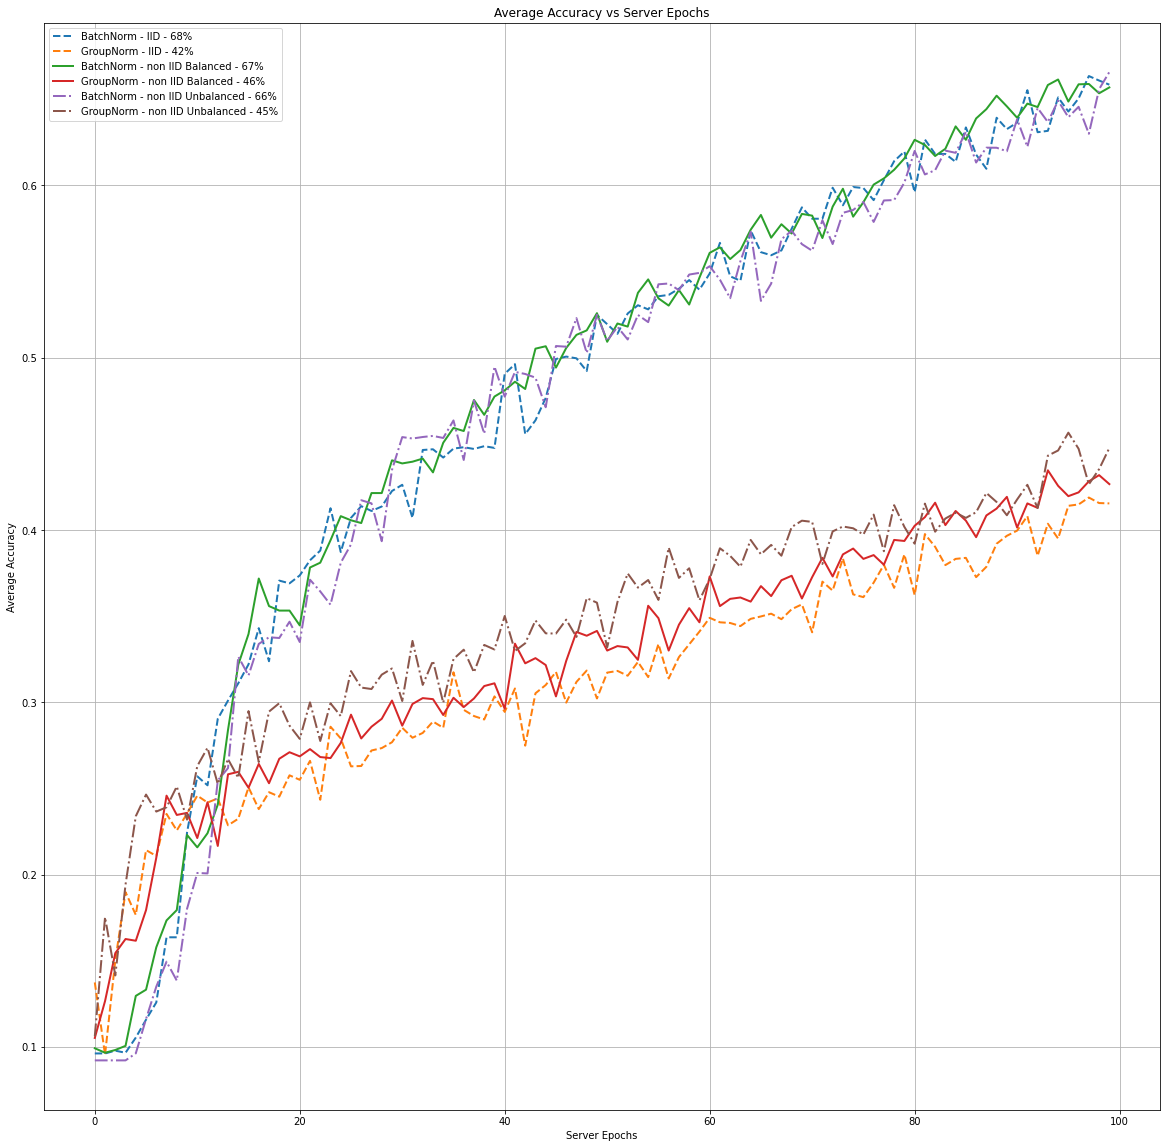

In [19]:
normalization_type = "GroupNorm" #BatchNorm or GroupNorm

fig, ax = plt.subplots(figsize=(20, 20))

ax.plot(range(len(train_acc_batchNorm_iid1_unbalanced0)), train_acc_batchNorm_iid1_unbalanced0, linewidth=2, linestyle='--', label="BatchNorm - IID - 68%")
ax.plot(range(len(train_acc_groupNorm_iid1_unbalanced0)), train_acc_groupNorm_iid1_unbalanced0, linewidth=2, linestyle='--', label="GroupNorm - IID - 42%")

ax.plot(range(len(train_acc_batchNorm_iid0_unbalanced0)), train_acc_batchNorm_iid0_unbalanced0, linewidth=2, linestyle='-', label="BatchNorm - non IID Balanced - 67%")
ax.plot(range(len(train_acc_groupNorm_iid0_unbalanced0)), train_acc_groupNorm_iid0_unbalanced0, linewidth=2, linestyle='-', label="GroupNorm - non IID Balanced - 46%")

ax.plot(range(len(train_acc_batchNorm_iid0_unbalanced1)), train_acc_batchNorm_iid0_unbalanced1, linewidth=2, linestyle='-.', label="BatchNorm - non IID Unbalanced - 66%")
ax.plot(range(len(train_acc_groupNorm_iid0_unbalanced1)), train_acc_groupNorm_iid0_unbalanced1, linewidth=2, linestyle='-.', label="GroupNorm - non IID Unbalanced - 45%")


plt.title("Average Accuracy vs Server Epochs")
plt.ylabel('Average Accuracy')
plt.xlabel('Server Epochs')

ax.legend()
ax.grid()

# file_name = '{}_{}_lr_[{}]_C[{}]_iid[{}]_E[{}]_B[{}]_loss.png'.format(
#     "ResNet50", n_epochs, lr, frac, iid,
#     local_epochs, local_batch_size)
# plt.savefig("fedAVG_summary_results.png")

plt.show()

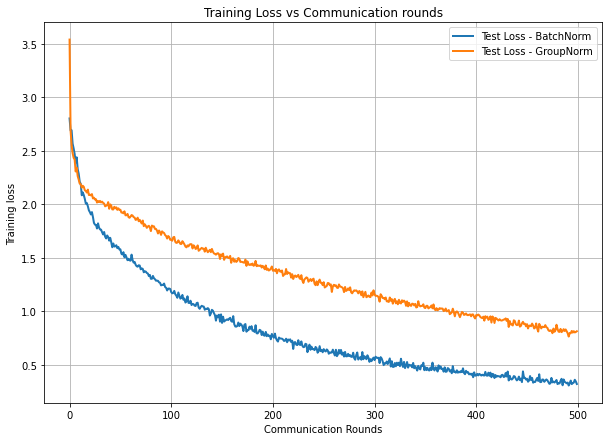

In [37]:
# normalization_type = "GroupNorm" #BatchNorm or GroupNorm
#
# fig, ax = plt.subplots(figsize=(10, 7))
#
# ax.plot(range(len(train_loss_batchNorm)), train_loss_batchNorm, linewidth=2, label="Test Loss - BatchNorm")
# ax.plot(range(len(train_loss_groupNorm)), train_loss_groupNorm, linewidth=2, label="Test Loss - GroupNorm")
#
# plt.title("Training Loss vs Communication rounds")
# plt.ylabel('Training loss')
# plt.xlabel('Communication Rounds')
#
# ax.legend()
# ax.grid()
#
# file_name = '{}_{}_lr_[{}]_C[{}]_iid[{}]_E[{}]_B[{}]_acc.png'.format(
#     "ResNet50", n_epochs, lr, frac, iid,
#     local_epochs, local_batch_size)
# plt.savefig(file_name)
#
# plt.show()

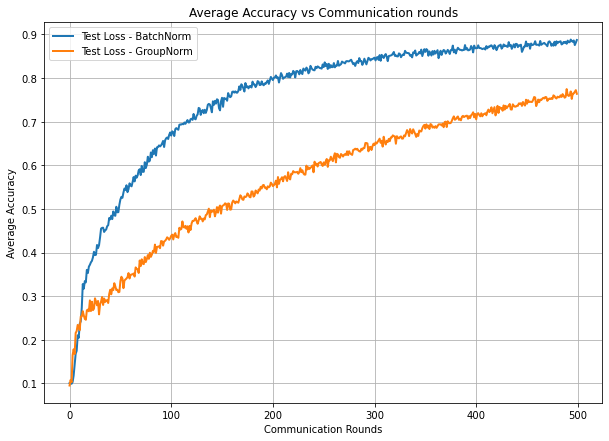

In [38]:
# normalization_type = "BatchNorm" #BatchNorm or GroupNorm
#
# # average accuracy vs communication rounds
# fig, ax = plt.subplots(figsize=(10, 7))
#
# ax.plot(range(len(train_accuracy_batchNorm)), train_accuracy_batchNorm, linewidth=2, label="Test Accuracy - BatchNorm")
# ax.plot(range(len(train_accuracy_groupNorm)), train_accuracy_groupNorm, linewidth=2, label="Test Accuracy - GroupNorm")
#
#
# plt.title("Average Accuracy vs Communication rounds")
# plt.ylabel('Average Accuracy')
# plt.xlabel('Communication Rounds')
#
# ax.legend()
# ax.grid()
#
# file_name = '{}_{}_lr_[{}]_C[{}]_iid[{}]_E[{}]_B[{}]_loss.png'.format(
#     "ResNet50", n_epochs, lr, frac, iid,
#     local_epochs, local_batch_size)
# plt.savefig(file_name)
#
# plt.show()

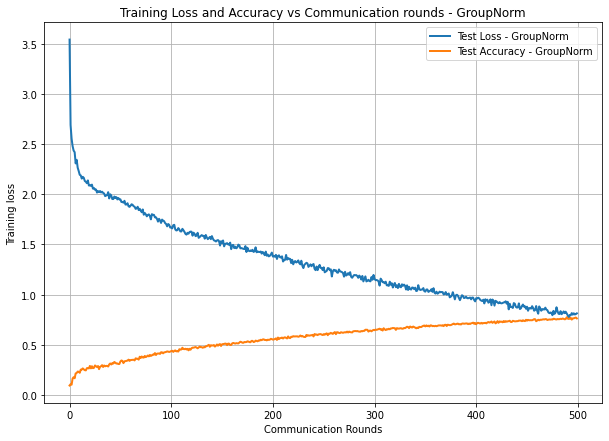

In [39]:
# normalization_type = "GroupNorm" #BatchNorm or GroupNorm
#
# fig, ax = plt.subplots(figsize=(10, 7))
#
# ax.plot(range(len(train_loss_groupNorm)), train_loss_groupNorm, linewidth=2, label="Test Loss - GroupNorm")
# ax.plot(range(len(train_accuracy_groupNorm)), train_accuracy_groupNorm, linewidth=2, label="Test Accuracy - GroupNorm")
#
# plt.title("Training Loss and Accuracy vs Communication rounds - GroupNorm")
# plt.ylabel('Training loss')
# plt.xlabel('Communication Rounds')
#
# ax.legend()
# ax.grid()
#
# file_name = '{}_{}_{}_lr_[{}]_C[{}]_iid[{}]_E[{}]_B[{}].png'.format(
#     "ResNet50", normalization_type, n_epochs, lr, frac, iid,
#     local_epochs, local_batch_size)
# plt.savefig(file_name)
#
# plt.show()

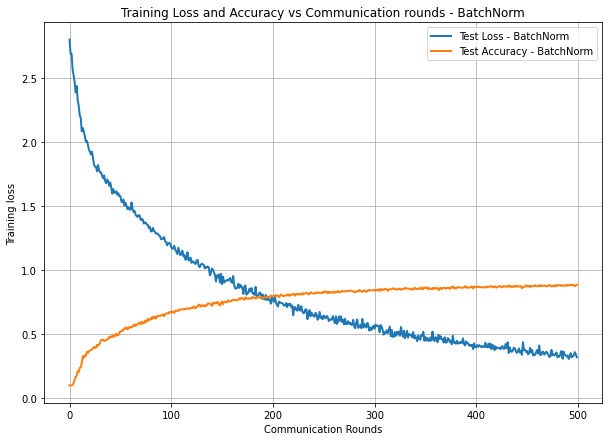

In [40]:
# normalization_type = "BatchNorm" #BatchNorm or GroupNorm
#
# fig, ax = plt.subplots(figsize=(10, 7))
#
# ax.plot(range(len(train_loss_batchNorm)), train_loss_batchNorm, linewidth=2, label="Test Loss - BatchNorm")
# ax.plot(range(len(train_accuracy_batchNorm)), train_accuracy_batchNorm, linewidth=2, label="Test Accuracy - BatchNorm")
#
# plt.title("Training Loss and Accuracy vs Communication rounds - BatchNorm")
# plt.ylabel('Training loss')
# plt.xlabel('Communication Rounds')
#
# ax.legend()
# ax.grid()
#
# file_name = '{}_{}_{}_lr_[{}]_C[{}]_iid[{}]_E[{}]_B[{}].png'.format(
#     "ResNet50", normalization_type, n_epochs, lr, frac, iid,
#     local_epochs, local_batch_size)
# plt.savefig(file_name)
#
# plt.show()